# CDOT Comparative Analysis

A brief exploratory analysis comparing rates of traffic and greenhouse gas emissions between on-road traffic and public transit in Colorado.

Objectives: Pick a question, which must be answered with public data sources, and write a medium article making use of descriptive statistics without using any data visualizations in the final article. Must cite at least 2 external and reliable resources.

This analysis and following write-up are intended to be an exercise in articulating how publicly available data sources could illuminate immediate questions like: 
- Is public transporation any better for the environment than driving on the road? How can you know? 
- How many people would be able to use it? 
- What would wait times look like for a transportation option like that?

If you would like to read the final article on Medium, you can [click here.](https://medium.com/information-expositions-spring-2023/new-ways-of-moving-against-climate-change-2d418207efd9)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Loading and Inspection

In [2]:
# Load all csv datasets into a dictionary 
path = "./data/"
files = os.listdir(path)
dfs = {
    name.split(".")[0]: pd.read_csv(os.path.join(path, name)) 
    for name in files
    if name.split(".")[1] == "csv"
    }

In [3]:
cdot_df = dfs["cdot_traffic_2012_2022"]

In [4]:
cdot_df["year"] = cdot_df["Date"].apply(lambda x: x.split("-")[0]).astype(int)

In [5]:
cdot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335880 entries, 0 to 335879
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Station    335880 non-null  int64 
 1   Date       335880 non-null  object
 2   Direction  335880 non-null  object
 3   Hour       335880 non-null  int64 
 4   Count      335880 non-null  int64 
 5   Weekday    335880 non-null  object
 6   year       335880 non-null  int32 
dtypes: int32(1), int64(3), object(3)
memory usage: 16.7+ MB


In [6]:
cdot_df.head()

,Station,Date,Direction,Hour,Count,Weekday,year
0,4,2012-01-01,P,0,444,Sunday,2012
1,4,2012-01-01,S,0,407,Sunday,2012
2,4,2012-01-02,P,0,119,Monday,2012
3,4,2012-01-02,S,0,220,Monday,2012
4,4,2012-01-03,P,0,160,Tuesday,2012


## CDOT Traffic Descriptive Statistics

In [7]:
cdot_df.describe()

,Station,Hour,Count,year
count,335880.000000,335880.000000,335880.000000,335880.000000
mean,235.618435,11.500000,1681.358441,2017.232512
std,249.323692,6.922197,1187.500610,3.209799
min,4.000000,0.000000,0.000000,2012.000000
25%,4.000000,5.750000,497.000000,2014.000000
50%,4.000000,11.500000,1667.000000,2017.000000
75%,504.000000,17.250000,2600.000000,2020.000000
max,504.000000,23.000000,6361.000000,2022.000000


array([[<AxesSubplot: title={'center': 'Station'}>,
        <AxesSubplot: title={'center': 'Hour'}>],
       [<AxesSubplot: title={'center': 'Count'}>,
        <AxesSubplot: title={'center': 'year'}>]], dtype=object)

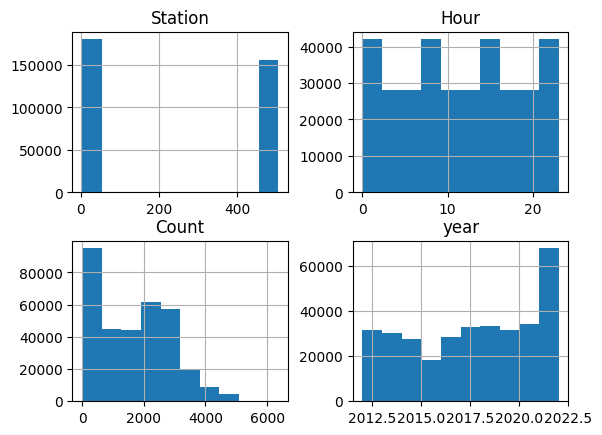

In [8]:
cdot_df.hist()

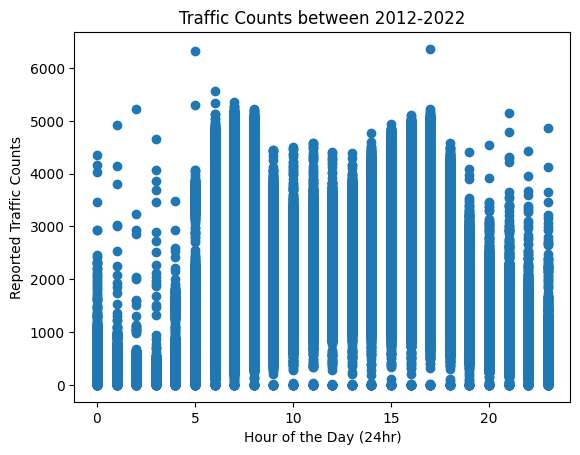

In [9]:
x = cdot_df.Hour.values
y = cdot_df.Count.values

plt.scatter(x, y)
plt.title("Traffic Counts between 2012-2022")
plt.xlabel("Hour of the Day (24hr)")
plt.ylabel("Reported Traffic Counts")
plt.show()

In [10]:
drop_cols = ["Station", "Date", "Direction", "Weekday"]
hour_counts_avg = cdot_df.drop(drop_cols, axis=1).groupby(["Hour"]).agg([np.mean])

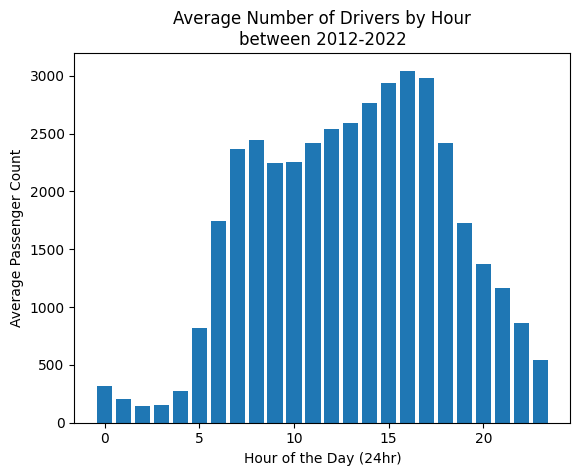

In [11]:
x = hour_counts_avg["Count"]["mean"].index
y = hour_counts_avg["Count"]["mean"].values

plt.bar(x, y)
plt.title("Average Number of Drivers by Hour\nbetween 2012-2022")
plt.ylabel("Average Passenger Count")
plt.xlabel("Hour of the Day (24hr)")
plt.show()

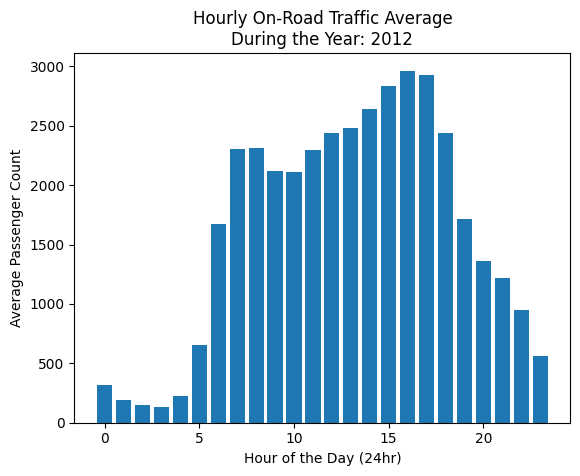

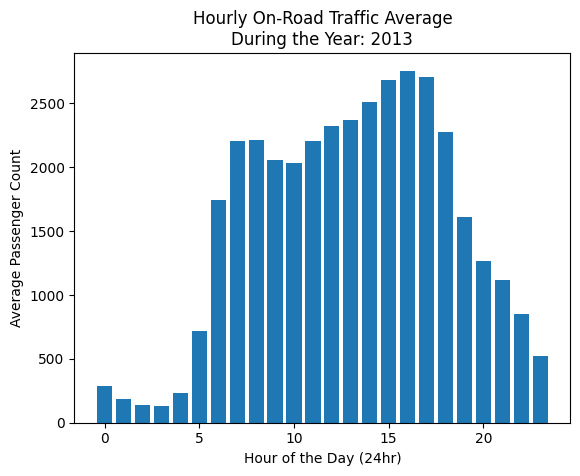

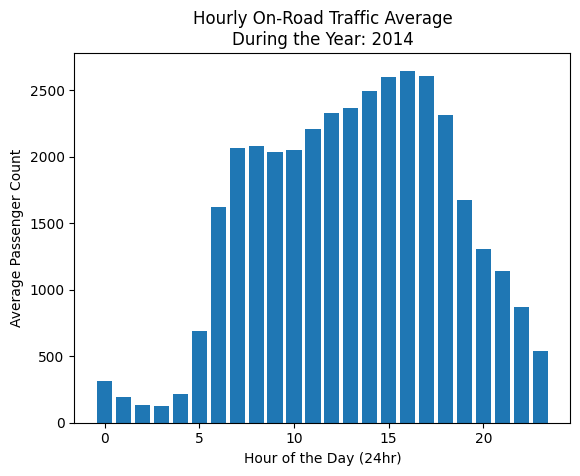

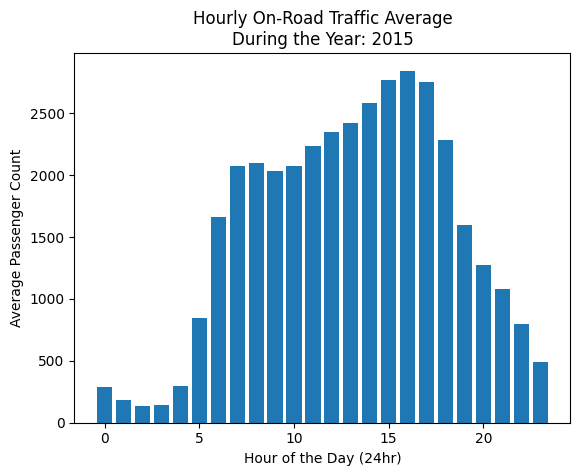

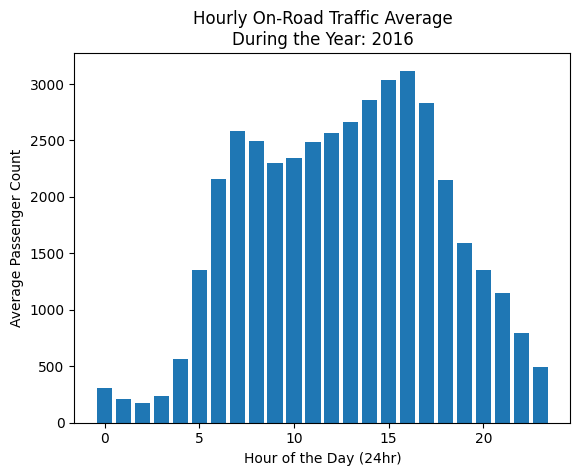

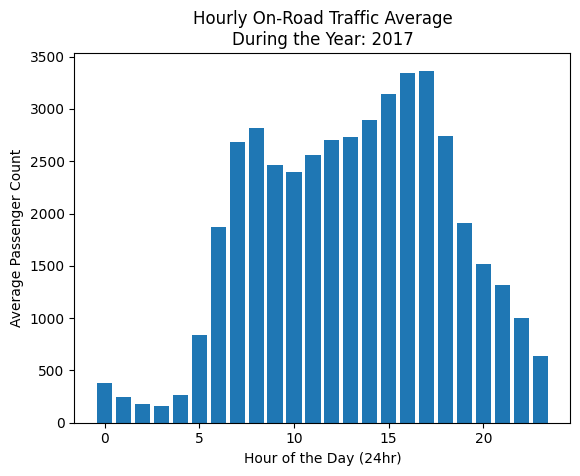

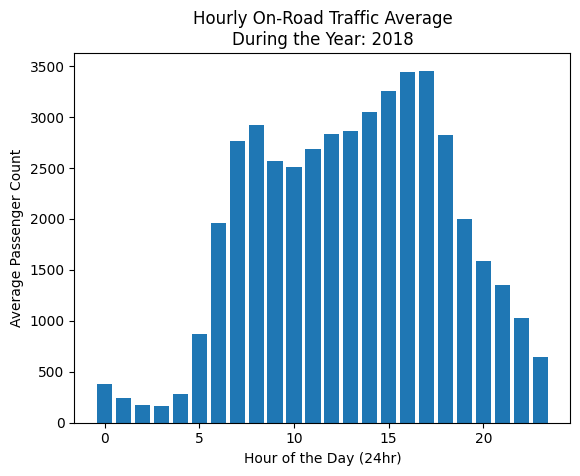

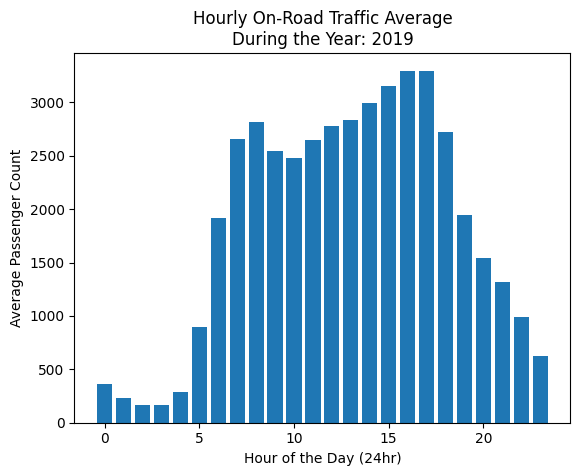

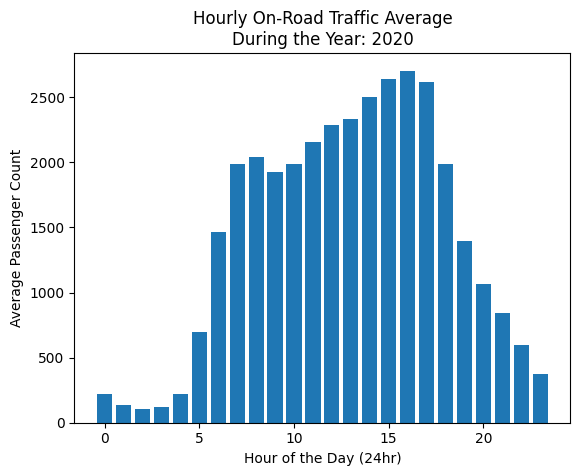

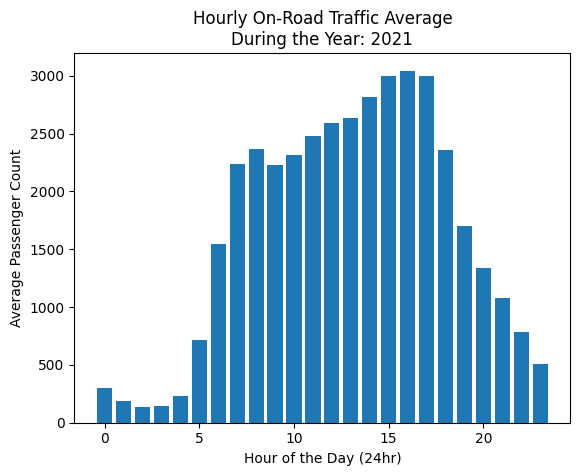

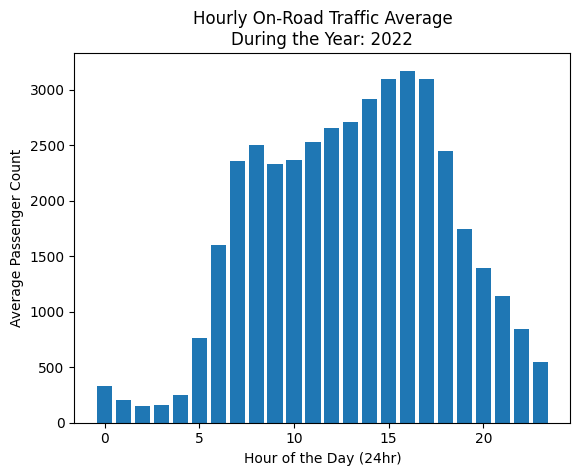

In [12]:
# Plot on-road traffic averages for each year, grouped by hour of the day
drop_cols = ["Station", "Date", "Direction", "Weekday"]
new_hour_counts_avg = cdot_df.drop(drop_cols, axis=1).groupby(["year", "Hour"]).agg([np.mean]).reset_index()

for year in new_hour_counts_avg["year"].unique():
    year_hour_avg = new_hour_counts_avg[new_hour_counts_avg["year"] == year]
    x = year_hour_avg["Hour"]
    y = year_hour_avg["Count"]["mean"]

    plt.bar(x, y)
    plt.title("Hourly On-Road Traffic Average\nDuring the Year: %s" % year)
    plt.ylabel("Average Passenger Count")
    plt.xlabel("Hour of the Day (24hr)")
    plt.show()

<AxesSubplot: title={'center': 'Count'}, xlabel='Hour'>

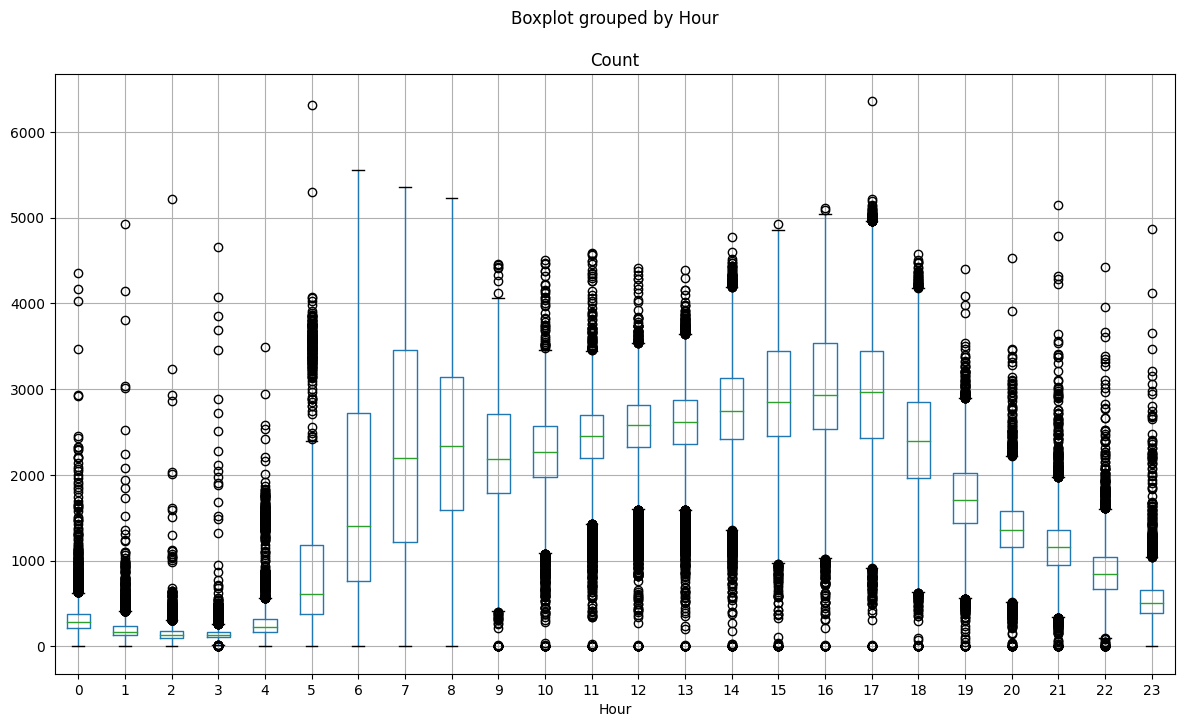

In [13]:
# Overall distribution of the on-road traffic between 2012-2022
cdot_df.boxplot("Count", by="Hour", figsize=(14, 8))

## Comparing Commuter Rail Capacity to Peak On-Road Traffic Counts

In [14]:
# Total commuter rail capacity
# ref: https://www.rtd-denver.com/rider-info/how-to-ride/commuter-rail
# B Line peak service time
# ref: https://www.rtd-denver.com/reports-and-policies/facts-figures/b-line

# Proposed Boulder-Denver Commuter Rail
B_line_peakservice_min = 30
total_capacity = 170

theoretical_capacity = (total_capacity * B_line_peakservice_min) * 2
print(f"{theoretical_capacity:,} passengers per Hour\n")

max_on_road_passenger_count = max(cdot_df.Count.values)
times_cap = theoretical_capacity / max_on_road_passenger_count
result_msg = f"Theoretical Capacity for the (finalized) B Line would move {times_cap:.3f}x more passengers per hour" \
    + "when compared to peak rates of on-road traffic between 2012-2022."
print(result_msg)

10,200 passengers per Hour

Theoretical Capacity for the (finalized) B Line would move 1.604x more passengers per hourwhen compared to peak rates of on-road traffic between 2012-2022.


In [15]:
on_road_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="On-Road Data")
transit_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="Transit Data")
rails_ghg_df = pd.read_excel("./data/2019_Denver_GHG_Inventory.xlsx", sheet_name="Railways Data")

on_road_emissions_total = on_road_ghg_df.iloc[4, 1]
transit_emissions_total = transit_ghg_df.iloc[4, 1]
rails_emissions_total = rails_ghg_df.iloc[4, 1]

## Comparing Greenhouse Gas (GHG) Emission totals between On-road Traffic and Public Transit

In [16]:
print("{:,.02f} Metric Tons of Emissions from On-Road Traffic."
      .format(on_road_emissions_total))

2,670,048.07 Metric Tons of Emissions from On-Road Traffic.


In [17]:
transit_emissions = f"{transit_emissions_total + rails_emissions_total:,.02f} metric Tons of Emissions" \
+ " from Public Transit (including buses, commuter rail, light rail, and rail)."
print(transit_emissions)

110,438.42 metric Tons of Emissions from Public Transit (including buses, commuter rail, light rail, and rail).


In [18]:
import math

total_emissions_diff = on_road_emissions_total / (transit_emissions_total + rails_emissions_total)
print(f"On-road traffic produced {total_emissions_diff:,.02f}x more metric tons of emissions than public transit in 2019.")

On-road traffic produced 24.18x more metric tons of emissions than public transit in 2019.
